FOMO -> 활동 우르르(장기 컨텐츠)

활동자 수가 한 번에 늘어나거나 줄어드는 경향 보임(유행을 많이 탐)
-> 장기적인 서비스를 제공하기 위해서는 위와 같은 형태가 줄어야


1. 회원가입 완료 대비 활동 기간 및 주기 분석
데이터 : 핵클 컬럼 회원가입 완료(complete_signup) + 보트 투표 기록 테이블(accounts_userquestionrecord)
-> 메인 이벤트가 투표니까 투표 기록 테이블에 만든시간으로 비교?
-> 회원 가입 후 얼마만에 사용하는지, 마지막 사용까지의 기간은?
-> 출석 날짜도 같이..

2. 주기는 출석 테이블을 활용? accounts_attendance
데이터 : 보트 출석테이블(accounts_attendance)
-> 유저 별 출석일의 평균, 횟수

나중에 출석일이랑 회원가입 후의 사용경향을 같이 봐도 좋을 듯듯

3. 방문 주기 혹은 사용 주기를 활용량으로 계산하기? 
-> 내용정리필요

4. 활동주기와 친구 수 의 상관관계
데이터 : 핵클 핵클이벤트(hackle_events>friend_count) 와 1번 분석 함께 보기?
-> 위와 같은 주기들이 친구 수와 연관이 있을까?
(ex 친구 수 가 많은 사람일 수록 방문 주기가 짧고 활동주기가 길다.)

5. 학교 별 사용자 집중도 및 이탈 패턴
데이터 : 핵클 유저 프로퍼티(user_properties) 와 1번 분석 함께
-> 학교 별 가입자 대비 현재 활동자 비율 추이
-> 혹은 거리상의 묶음 별 활동자 비율 추이?

6. acount_user의 pending chat 안읽은 채팅 갯수 & pending vote 확인안한 투표갯수
-> 위의 결과가 높은 학생들은 fomo영향력이 낮은 유저(반대성향)의 사용자로 볼 수 있음(귀찮아서 일수도 있지망,,)

In [ ]:
# 1. 회원가입 완료 대비 활동 기간 및 주기 분석
# 데이터 : 핵클 컬럼 회원가입 완료(complete_signup) + 보트 투표 기록 테이블(accounts_userquestionrecord)
# -> 메인 이벤트가 투표니까 투표 기록 테이블에 만든시간으로 비교?
# -> 회원 가입 후 얼마만에 사용하는지, 마지막 사용까지의 기간은?

In [ ]:
# 핵클 이벤트 테이블 불러오기

import os
import pandas as pd
from google.cloud import storage

# GCS에서 Parquet 파일 불러오기 및 형식 확인
print("\n--- 2. GCS Parquet 파일 로드 및 형식 확인 ---")
gcs_parquet_path = "gs://sprintda05_final_project/hackle/hackle_events.parquet"

print(f"📂 다음 Parquet 파일을 불러옵니다: {gcs_parquet_path}")

# pandas를 사용하여 Parquet 파일 불러오기
# 'engine'을 'pyarrow'로 명시하여 확실하게 pyarrow 사용
# gcsfs가 설치되어 있다면 pandas는 gs:// 경로를 자동으로 처리
hackle_events = pd.read_parquet(gcs_parquet_path, engine='pyarrow')

print("\n✅ Parquet 파일 로드 성공!")

print("\n--- 데이터프레임 상위 5개 행 (hackle_events.head()) ---")
print(hackle_events.head())

print("\n--- 데이터프레임 정보 (hackle_events.info()) ---")
# 각 컬럼의 이름, Non-Null 개수, 데이터 타입(Dtype) 확인
hackle_events.info()

print("\n--- 데이터프레임 기술 통계 (hackle_events.describe()) ---")
# 숫자형 컬럼에 대한 통계 정보 확인
print(hackle_events.describe(include='all')) # 모든 컬럼 타입 포함

print(f"\n--- 데이터프레임 행과 열 개수 (hackle_events.shape): {hackle_events.shape} ---")

print("\n--- 데이터프레임 컬럼 목록 (hackle_events.columns) ---")
print(hackle_events.columns.tolist())


--- 2. GCS Parquet 파일 로드 및 형식 확인 ---
📂 다음 Parquet 파일을 불러옵니다: gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet

✅ Parquet 파일 로드 성공!

--- 데이터프레임 상위 5개 행 (accounts_userquestionrecord.head()) ---
       id status          created_at  chosen_user_id  question_id  user_id  \
0  771777      C 2023-04-28 12:27:49          849469          252   849436   
1  771800      C 2023-04-28 12:28:02          849446          244   849436   
2  771812      C 2023-04-28 12:28:09          849454          183   849436   
3  771828      C 2023-04-28 12:28:16          847375          101   849436   
4  771851      C 2023-04-28 12:28:26          849477          209   849436   

   question_piece_id  has_read answer_status   answer_updated_at  \
0             998458         0             N 2023-04-28 12:27:49   
1             998459         0             N 2023-04-28 12:28:02   
2             998460         1             N 2023-04-28 12:28:09   
3             998461         0             

In [10]:
# 보트 투료기록테이블 불러오기

import os
import pandas as pd
from google.cloud import storage

# GCS에서 Parquet 파일 불러오기 및 형식 확인
print("\n--- 2. GCS Parquet 파일 로드 및 형식 확인 ---")
gcs_parquet_path = "gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet"

print(f"📂 다음 Parquet 파일을 불러옵니다: {gcs_parquet_path}")

# pandas를 사용하여 Parquet 파일 불러오기
# 'engine'을 'pyarrow'로 명시하여 확실하게 pyarrow 사용
# gcsfs가 설치되어 있다면 pandas는 gs:// 경로를 자동으로 처리
accounts_userquestionrecord = pd.read_parquet(gcs_parquet_path, engine='pyarrow')

print("\n✅ Parquet 파일 로드 성공!")

print("\n--- 데이터프레임 상위 5개 행 (accounts_userquestionrecord.head()) ---")
print(accounts_userquestionrecord.head())

print("\n--- 데이터프레임 정보 (accounts_userquestionrecord.info()) ---")
# 각 컬럼의 이름, Non-Null 개수, 데이터 타입(Dtype) 확인
accounts_userquestionrecord.info()

print("\n--- 데이터프레임 기술 통계 (accounts_userquestionrecord.describe()) ---")
# 숫자형 컬럼에 대한 통계 정보 확인
print(accounts_userquestionrecord.describe(include='all')) # 모든 컬럼 타입 포함

print(f"\n--- 데이터프레임 행과 열 개수 (accounts_userquestionrecord.shape): {accounts_userquestionrecord.shape} ---")

print("\n--- 데이터프레임 컬럼 목록 (accounts_userquestionrecord.columns) ---")
print(accounts_userquestionrecord.columns.tolist())


--- 2. GCS Parquet 파일 로드 및 형식 확인 ---
📂 다음 Parquet 파일을 불러옵니다: gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet

✅ Parquet 파일 로드 성공!

--- 데이터프레임 상위 5개 행 (accounts_userquestionrecord.head()) ---
       id status          created_at  chosen_user_id  question_id  user_id  \
0  771777      C 2023-04-28 12:27:49          849469          252   849436   
1  771800      C 2023-04-28 12:28:02          849446          244   849436   
2  771812      C 2023-04-28 12:28:09          849454          183   849436   
3  771828      C 2023-04-28 12:28:16          847375          101   849436   
4  771851      C 2023-04-28 12:28:26          849477          209   849436   

   question_piece_id  has_read answer_status   answer_updated_at  \
0             998458         0             N 2023-04-28 12:27:49   
1             998459         0             N 2023-04-28 12:28:02   
2             998460         1             N 2023-04-28 12:28:09   
3             998461         0             

In [1]:
# 보트 출석테이블블 불러오기

import os
import pandas as pd
from google.cloud import storage

# GCS에서 Parquet 파일 불러오기 및 형식 확인
print("\n--- 2. GCS Parquet 파일 로드 및 형식 확인 ---")
gcs_parquet_path = "gs://sprintda05_final_project/votes/accounts_attendance.parquet"

print(f"📂 다음 Parquet 파일을 불러옵니다: {gcs_parquet_path}")

# pandas를 사용하여 Parquet 파일 불러오기
# 'engine'을 'pyarrow'로 명시하여 확실하게 pyarrow 사용
# gcsfs가 설치되어 있다면 pandas는 gs:// 경로를 자동으로 처리
accounts_attendance = pd.read_parquet(gcs_parquet_path, engine='pyarrow')

print("\n✅ Parquet 파일 로드 성공!")

print("\n--- 데이터프레임 상위 5개 행 (accounts_attendance.head()) ---")
print(accounts_attendance.head())

print("\n--- 데이터프레임 정보 (accounts_attendance.info()) ---")
# 각 컬럼의 이름, Non-Null 개수, 데이터 타입(Dtype) 확인
accounts_attendance.info()

print("\n--- 데이터프레임 기술 통계 (accounts_attendance.describe()) ---")
# 숫자형 컬럼에 대한 통계 정보 확인
print(accounts_attendance.describe(include='all')) # 모든 컬럼 타입 포함

print(f"\n--- 데이터프레임 행과 열 개수 (accounts_attendance.shape): {accounts_attendance.shape} ---")

print("\n--- 데이터프레임 컬럼 목록 (accounts_attendance.columns) ---")
print(accounts_attendance.columns.tolist())


--- 2. GCS Parquet 파일 로드 및 형식 확인 ---
📂 다음 Parquet 파일을 불러옵니다: gs://sprintda05_final_project/votes/accounts_attendance.parquet

✅ Parquet 파일 로드 성공!

--- 데이터프레임 상위 5개 행 (accounts_attendance.head()) ---
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453

--- 데이터프레임 정보 (accounts_attendance.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null

# |1. 회원가입 완료 대비 활동 기간 및 주기 분석

In [2]:
# 컬럼명 확인
print(hackle_events.columns)

Index(['event_id', 'event_datetime', 'event_key', 'session_id', 'id',
       'item_name', 'page_name', 'friend_count', 'votes_count',
       'heart_balance', 'question_id'],
      dtype='object')


In [3]:
signup_events = hackle_events[hackle_events['event_key'] == 'complete_signup']
signup_events

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
20469,0076d12e-cf36-4aa8-8140-dfb1d2eae24b,2023-07-20 19:06:26,complete_signup,EBB7AAFB-6071-458C-A8EA-3B27E8960C71,0076d12e-cf36-4aa8-8140-dfb1d2eae24b,,,0.0,0.0,300.0,NaN
35117,00cabaf0-bd1c-41c8-bcef-02fcceecfefb,2023-07-29 19:47:57,complete_signup,4e9bdccd-18d1-43d4-bcc8-ffcc84ccadba,00cabaf0-bd1c-41c8-bcef-02fcceecfefb,,,0.0,0.0,300.0,NaN
55521,013fb9a3-0b8d-41f5-a690-d58cd398b9a4,2023-07-26 02:23:04,complete_signup,53608491-9A79-4E27-8AC6-B111D0B42A0A,013fb9a3-0b8d-41f5-a690-d58cd398b9a4,,,0.0,0.0,300.0,NaN
63017,016b7031-bcbc-48d3-ad89-c4a5d803b0a8,2023-07-19 13:34:11,complete_signup,679f672f-d5ce-4c6a-bad0-7a8e7070e625,016b7031-bcbc-48d3-ad89-c4a5d803b0a8,,,0.0,0.0,300.0,NaN
73825,01a968a6-52a2-4267-8a27-69e41ee49e87,2023-08-08 10:58:17,complete_signup,005C4D5D-BF73-428A-96D0-160B200497E3,01a968a6-52a2-4267-8a27-69e41ee49e87,,,0.0,0.0,300.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11397793,ff049a95-3817-4ce1-aaf7-782b0d499247,2023-08-01 12:51:29,complete_signup,CF4D1680-AF7A-4AD9-83BA-FAC7A563E444,ff049a95-3817-4ce1-aaf7-782b0d499247,,,0.0,0.0,300.0,NaN
11405709,ff32947d-2cc9-4c7e-8335-0eb8f27387a1,2023-07-24 23:59:41,complete_signup,4ff8b730-88ac-436e-b62a-9d2129bfe15e,ff32947d-2cc9-4c7e-8335-0eb8f27387a1,,,0.0,0.0,300.0,NaN
11412168,ff57b47c-61bc-405d-b77a-8016e02c44ab,2023-07-21 19:19:23,complete_signup,BEC7D7C3-C133-466A-99D4-3165EE5D9B5E,ff57b47c-61bc-405d-b77a-8016e02c44ab,,,0.0,0.0,300.0,NaN
11415006,ff685ed1-0924-4213-bbb3-e51fee6737ef,2023-08-07 22:39:49,complete_signup,715AE207-64D2-4FC3-863F-ADF82B35C4B5,ff685ed1-0924-4213-bbb3-e51fee6737ef,,,0.0,0.0,300.0,NaN


In [4]:
# 회원가입을 하면 300하트를 기본으로 제공하는 것 같다.
signup_events['heart_balance'].value_counts()

heart_balance
300.0    974
Name: count, dtype: int64

In [5]:
# 회원가입 직 후 친구수는 0명(당연함)
signup_events['friend_count'].value_counts()

friend_count
0.0    974
Name: count, dtype: int64

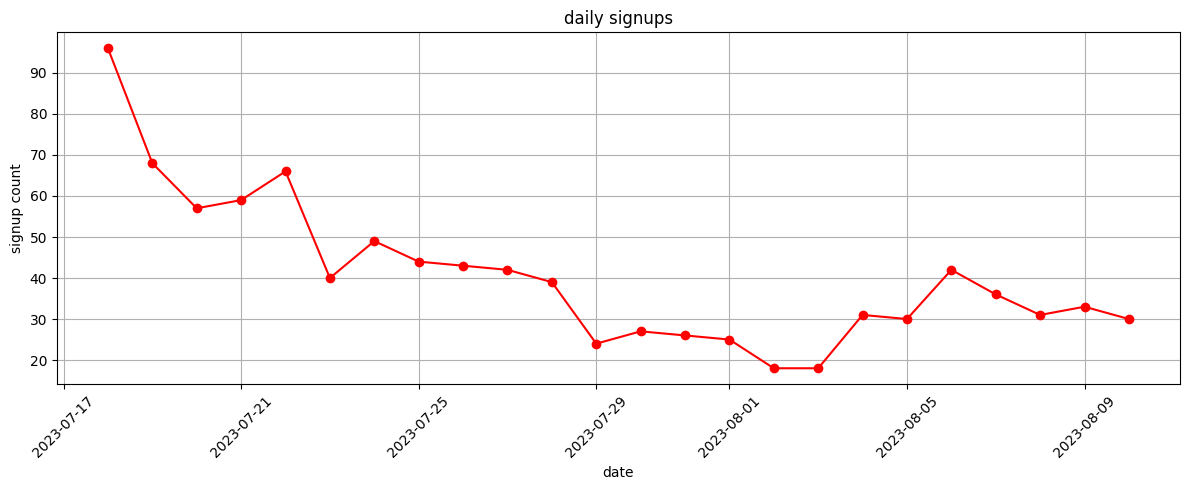

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 복사해서 경고 방지
signup_events = signup_events.copy()

# 날짜 처리
signup_events['event_datetime'] = pd.to_datetime(signup_events['event_datetime'])
signup_events['event_date'] = signup_events['event_datetime'].dt.date

# 날짜별 회원가입 수 집계
signup_by_date = signup_events['event_date'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(signup_by_date.index, signup_by_date.values, marker='o', color='red')
plt.title('daily signups')
plt.xlabel('date')
plt.ylabel('signup count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


전체 날짜가 길지는 않지만 그 중에서도 7월 초기가 가입수가 제일 많고 점점 줄어드는 경향 보임

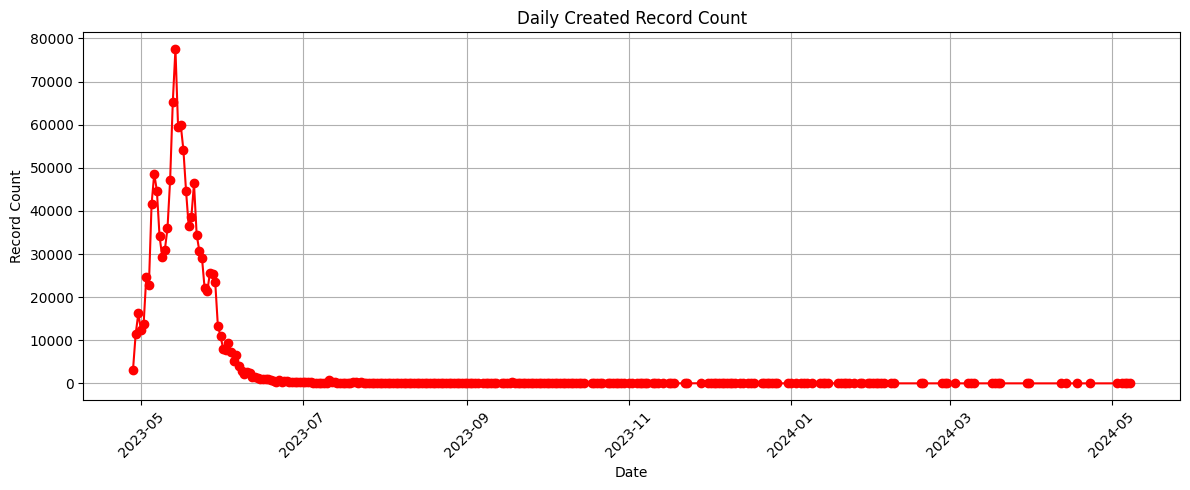

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 복사 및 날짜 처리
df = accounts_userquestionrecord.copy()
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_date'] = df['created_at'].dt.date

# 날짜별 건수 집계
created_count_by_date = df['created_date'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(created_count_by_date.index, created_count_by_date.values, marker='o', color='red')
plt.title('Daily Created Record Count')
plt.xlabel('Date')
plt.ylabel('Record Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# '년-월' 단위로 그룹화
df['created_month'] = df['created_at'].dt.to_period('M')

# 월별 건수 집계
created_count_by_month = df['created_month'].value_counts().sort_index()

# DataFrame 변환
monthly_df = created_count_by_month.reset_index()
monthly_df.columns = ['month', 'created_count']

# 출력
print(monthly_df)


      month  created_count
0   2023-04          30798
1   2023-05        1104681
2   2023-06          71341
3   2023-07           5396
4   2023-08           2050
5   2023-09           1665
6   2023-10            330
7   2023-11            253
8   2023-12            502
9   2024-01            236
10  2024-02            154
11  2024-03             81
12  2024-04             33
13  2024-05             38


# 2. 유저 별 출석일의 평균 혹은 주기

In [19]:
import pandas as pd
import ast

df = accounts_attendance.copy()

# 문자열로 되어 있는 리스트를 실제 리스트로 변환
df['attendance_date_list'] = df['attendance_date_list'].apply(ast.literal_eval)

# 리스트를 행으로 펼치기
df = df.explode('attendance_date_list')

# 날짜 타입으로 변환
df['attendance_date'] = pd.to_datetime(df['attendance_date_list'])

# 필요 없는 컬럼 제거 (선택)
df = df[['user_id', 'attendance_date']]
df


,user_id,attendance_date
0,1446852,2023-05-27
0,1446852,2023-05-28
0,1446852,2023-05-29
0,1446852,2023-05-30
0,1446852,2023-06-03
...,...,...
349632,897005,NaT
349633,1407059,2024-05-09
349634,1583727,2024-05-09
349635,1392372,2024-05-09


In [22]:
# 전체 컬럼별 결측치 개수
print(df.isnull().sum())


user_id                0
attendance_date    20945
dtype: int64


In [23]:
missing_dates = df[df['attendance_date'].isna()]
print(missing_dates)
print(f'\n총 결측치 수: {len(missing_dates):,}건')


        user_id attendance_date
19      1484400             NaT
237     1284925             NaT
306     1451267             NaT
333     1483247             NaT
366     1173480             NaT
...         ...             ...
349618  1162275             NaT
349622   935331             NaT
349628  1127910             NaT
349629   851491             NaT
349632   897005             NaT

[20945 rows x 2 columns]

총 결측치 수: 20,945건


In [27]:
missing_dates[(missing_dates['user_id'] == 1484400)]


,user_id,attendance_date
19,1484400,NaT


In [30]:
missing_dates['user_id'].nunique()

20945

2222

In [2]:
import pandas as pd
import ast

df = accounts_attendance.copy()

# 문자열로 되어 있는 리스트를 실제 리스트로 변환
df['attendance_date_list'] = df['attendance_date_list'].apply(ast.literal_eval)


In [3]:
# 전체 컬럼별 결측치 개수
print(df.isnull().sum())

id                      0
attendance_date_list    0
user_id                 0
dtype: int64


In [4]:
# 빈 리스트 또는 NaN (결측치)인 경우
missing_list_rows = df[
    df['attendance_date_list'].isna() | df['attendance_date_list'].apply(lambda x: isinstance(x, list) and len(x) == 0)
]

# 결과 확인
print(missing_list_rows.head())
print(f'\n해당 행 수: {len(missing_list_rows):,}건')

      id attendance_date_list  user_id
19    20                   []  1484400
237  243                   []  1284925
306  312                   []  1451267
333  339                   []  1483247
366  375                   []  1173480

해당 행 수: 20,945건


In [5]:
# 리스트를 행으로 펼치기
df = df.explode('attendance_date_list')

# attendance_date 생성
df['attendance_date'] = pd.to_datetime(df['attendance_date_list'], errors='coerce')

# 결측치 제거
df_cleaned = df[df['attendance_date'].notna()].copy()

print(f'결측치 제거 완료! 남은 행 수: {len(df_cleaned):,}건')

결측치 제거 완료! 남은 행 수: 2,222,327건


In [6]:
2243272-20945

2222327

In [7]:
df = df_cleaned[['user_id','attendance_date']]

In [11]:
df['user_id'].nunique()

328692

In [9]:
df

# 1. 전체 방문 횟수 (중복 포함)
visit_count_df = df.groupby('user_id').size().reset_index(name='visit_count')

# 2. 유니크 날짜 기준 방문 주기 계산
df_unique = df[['user_id', 'attendance_date']].drop_duplicates()
df_unique = df_unique.sort_values(by=['user_id', 'attendance_date'])
df_unique['prev_date'] = df_unique.groupby('user_id')['attendance_date'].shift(1)
df_unique['interval_days'] = (df_unique['attendance_date'] - df_unique['prev_date']).dt.days

avg_interval_df = df_unique.groupby('user_id')['interval_days'].mean().reset_index()
avg_interval_df.columns = ['user_id', 'avg_interval_days']

# 3. 병합
summary_df = pd.merge(visit_count_df, avg_interval_df, on='user_id', how='left')

# 결과 확인
print(summary_df.head())


   user_id  visit_count  avg_interval_days
0   832151            1                NaN
1   832340            2           1.000000
2   832986            1                NaN
3   833041           53           4.961538
4   833112            3           3.000000


In [12]:
summary_df['avg_interval_days'] = summary_df['avg_interval_days'].fillna(0)


In [13]:
summary_df

,user_id,visit_count,avg_interval_days
0,832151,1,0.000000
1,832340,2,1.000000
2,832986,1,0.000000
3,833041,53,4.961538
4,833112,3,3.000000
...,...,...,...
328687,1583708,1,0.000000
328688,1583710,1,0.000000
328689,1583715,1,0.000000
328690,1583727,1,0.000000


In [19]:
# visit_count 통계
print('📊 visit_count 통계:')
print(summary_df['visit_count'].describe())

# avg_interval_days 통계
print('\n📊 avg_interval_days 통계:')
print(summary_df['avg_interval_days'].describe())



📊 visit_count 통계:
count    328692.000000
mean          6.761123
std           9.299667
min           1.000000
25%           2.000000
50%           4.000000
75%           9.000000
max         310.000000
Name: visit_count, dtype: float64

📊 avg_interval_days 통계:
count    328692.000000
mean          5.762978
std          15.659977
min           0.000000
25%           1.000000
50%           1.714286
75%           4.000000
max         345.000000
Name: avg_interval_days, dtype: float64


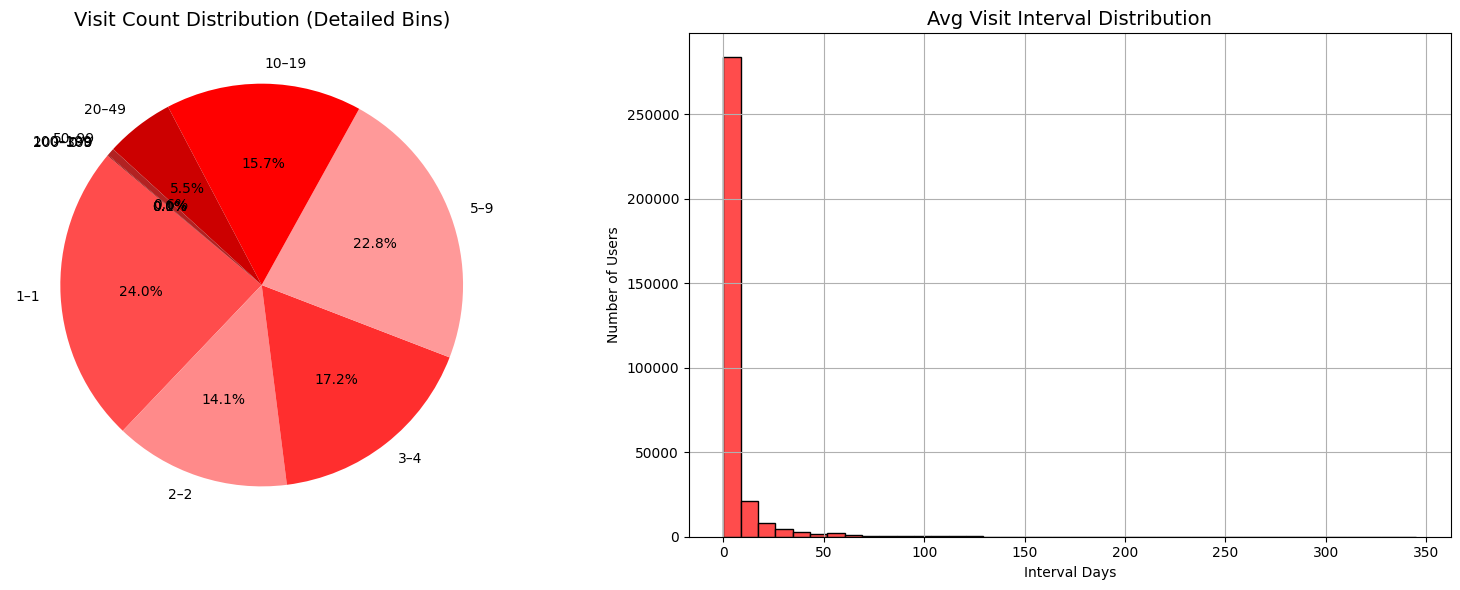

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. visit_count 구간화
visit_bins = pd.cut(summary_df['visit_count'],
                    bins=[0, 1, 2, 3, 5, 10, 20, 50, 100, 200, summary_df['visit_count'].max()],
                    right=False)
visit_counts_grouped = visit_bins.value_counts().sort_index()
labels = [f'{int(i.left)}–{int(i.right)-1}' for i in visit_counts_grouped.index]

# 2. avg_interval_days 데이터
interval_values = summary_df['avg_interval_days'].dropna()

# 3. 붉은색 계열 설정
red_palette = ['#FF6B6B', '#FF4C4C', '#FF8A8A', '#FF2E2E', '#FF9999',
               '#FF0000', '#CC0000', '#B22222', '#8B0000', '#E60000']

# 4. 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 왼쪽: 파이차트 (visit_count)
axes[0].pie(visit_counts_grouped,
            labels=labels,
            autopct='%1.1f%%',
            startangle=140,
            colors=red_palette[:len(labels)],
            textprops={'fontsize': 10})
axes[0].set_title('Visit Count Distribution (Detailed Bins)', fontsize=14)

# 오른쪽: 히스토그램 (avg_interval_days)
axes[1].hist(interval_values, bins=40, color='#FF4C4C', edgecolor='black')
axes[1].set_title('Avg Visit Interval Distribution', fontsize=14)
axes[1].set_xlabel('Interval Days')
axes[1].set_ylabel('Number of Users')
axes[1].grid(True)

plt.tight_layout()
plt.show()
